In [2]:
%pip install pandas
%pip install numpy
%pip install keras


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:


import numpy as np
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Model

from keras.datasets import cifar100
     

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train, X_test = X_train/255, X_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(X_train.shape)
print(y_train.shape)
     

(50000, 32, 32, 3)
(50000,)


In [11]:
k = len(set(y_train))
k
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)
datagen.fit(X_train)
     

In [12]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.15)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.15)(x)
x = Dense(k, activation='softmax')(x)
model = Model(i, x)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)


Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 59ms/step - accuracy: 0.1172 - loss: 4.0277 - val_accuracy: 0.1950 - val_loss: 3.3981
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 63ms/step - accuracy: 0.3034 - loss: 2.7541 - val_accuracy: 0.3512 - val_loss: 2.5820
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.4083 - loss: 2.2445 - val_accuracy: 0.4253 - val_loss: 2.1853
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4818 - loss: 1.9094 - val_accuracy: 0.4236 - val_loss: 2.1839
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.5460 - loss: 1.6336 - val_accuracy: 0.4810 - val_loss: 1.9333
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5973 - loss: 1.3925 - val_accuracy: 0.5018 - val_loss: 1.9196
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6695 - loss: 1.1351 - val_accuracy: 0.4896 - val_loss: 2.0036
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7211 - loss:

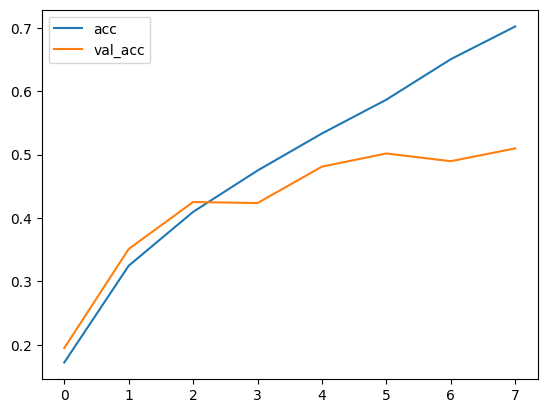

In [14]:

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

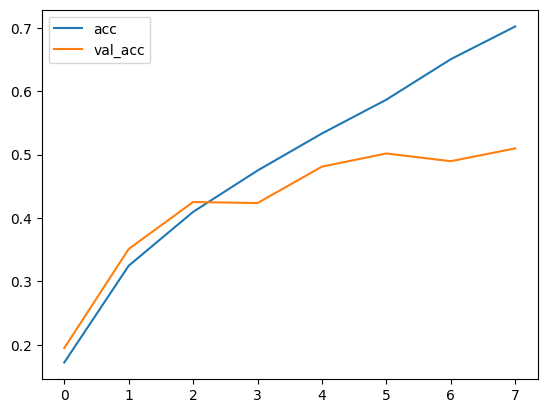

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[44]


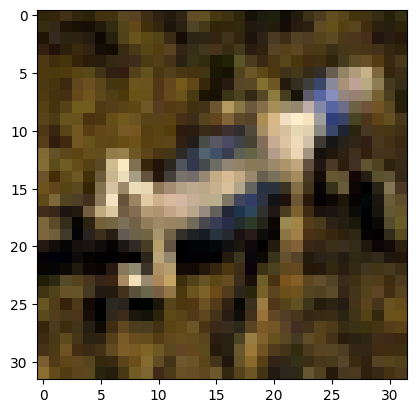

In [17]:
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
test=(X_train[2534])

print(np.argmax(model.predict(test.reshape(1,32,32,3)), axis=1))
img=array_to_img(test)
plt.imshow(img)